In [18]:
import random
def insort(array,comparisons=0):
    sort=[array[0]]#sorted array initialized with first element of input
    for i in range(1,len(array)):#loop through input array
        for z in range(0,len(sort)):#loop through sorted array
            if array[i]>sort[z]:
                comparisons+=1
                if z==len(sort)-1:#end of sorted array
                    sort.append(array[i])#just paste at end
                continue
            if array[i]<=sort[z]:# if true, we know where to place element from input array into sorted array
                comparisons+=1
                sort.insert(z,array[i])
                break
    return comparisons
#####################################
def quick(array,left=0,right=-1,comparisons=0):
    if right<0:#right<0 only initially
        right=len(array)-1
    L,R=left,right#backup of left and right
    P=L#random.randint(L,R)
    pivot=array[P]
    #left loop
    while(left<right):
        for left in range(left,R+1):#move left to its position
            if array[left]>pivot:
                break
            else:
                comparisons+=1
        for right in range(right,L-1,-1):#move right to its position
            if array[right]<pivot:
                break
            else:
                comparisons+=1
        if left<right:
            array[left],array[right]=array[right],array[left]#swap left and right
    if P<=right:#swap right with pivot
        array[right],array[P]=pivot,array[right]
        P=right
    else:#swap left with pivot
        array[left],array[P]=pivot,array[left]
        P=left
    c1,c2=0,0#contains number of comparisons from sub problems
    if P-L>=2:
        c1=quick(array,L,P-1)
    if R-P>=2:
        c2=quick(array,P+1,R)
    return c1+c2+comparisons

   
#####################################################
def merge(a1,a2,j=0,k=0,comparisons=0):#a1 and a2 are to be merged in a3, j and k iterate through a1 and a2 respectively
    a3=[]#contains sorted array
    for i in range(0,len(a1)+len(a2)):#final length of a3 basically
        if j<len(a1) and (k>=len(a2) or a1[j]<=a2[k]) :
            # if a1 has not been copied completely AND (all of a2 as been copied OR a1 has smaller element)
            if k>=len(a2):#a2 has nothing left
                a3.append(a1[j:len(a1)])#copy remaining a1
                return a3,comparisons
            else:
                a3.append(a1[j])
                j+=1
        else:
            if j>=len(a1):#a1 has nothing left
                a3.append(a1[k:len(a2)])#copy remaining a2
                return a3,comparisons
            else:
                a3.append(a2[k])
                k+=1
        comparisons+=1
    return a3,comparisons
def msort(ar,comparisons=0):
    if len(ar)==2:#if input length is two, we just need to compare once and swap if required
        if ar[0]>ar[1]:
            ar[0],ar[1]=ar[1],ar[0]
        return ar,1
    if len(ar)==1:#if input length 1, theres nothing to do
        return ar,0
    else:
        half=int(len(ar)/2)
        x=msort(ar[:half])#first half
        y=msort(ar[half:])#second half
        return merge(x[0],y[0],0,0,x[1]+y[1])#x[0] contains sorted array, x[1] contains number of comparisons done to generate it
########################################
   
            

In [27]:
samples=2#Number of samples
sum1=0#Number of comparisons done by msort
sum2=0#comparisons by quicksort
sum3=0#comparisons by insort
NSize=[]#input size
insertion_sort=[]#each element stores number of comparisons for a given value of N
quick_sort=[]
merge_sort=[]
step=10#distance between each n value

for a in range(1,101):#N values from 1 to 1000
    NSize.append(a*step)
    for b in range(0,samples):#runs algo "samples" times
        inputlist=[]#contains unsorted input
        for c in range(0,10*a):#generates random input
                inputlist.append(random.randint(1,1000))
        sum1+=msort(inputlist)[1]#msort returns array of size two, first element is sorted array, second is number of comparisons
        sum3+=insort(inputlist)
        sum2+=quick(inputlist)
    quick_sort.append(float(sum2)/samples)#divide by samples to get average
    merge_sort.append(float(sum1)/samples)
    insertion_sort.append(float(sum3)/samples)
print('Quick',quick_sort)
print('Merge',merge_sort)
print('Insertion',insertion_sort)



('Quick', [38.5, 131.5, 295.0, 504.5, 826.5, 1204.0, 1669.5, 2275.0, 2903.5, 3612.0, 4413.5, 5372.0, 6388.5, 7500.5, 8733.0, 10208.0, 11585.0, 13357.5, 14926.5, 16584.5, 18472.0, 20346.0, 22329.5, 24525.5, 26818.0, 29337.5, 31861.5, 34618.5, 37385.0, 40220.0, 43123.5, 46239.0, 49199.5, 52377.5, 55680.0, 59225.0, 62878.0, 66746.5, 70619.0, 74610.5, 78744.5, 82880.0, 87167.0, 91688.5, 96962.5, 101948.5, 107026.0, 111990.5, 117205.0, 122519.5, 127644.0, 133766.5, 139430.0, 145462.0, 151207.0, 157037.0, 163102.5, 169333.0, 176064.5, 182881.0, 189557.5, 196322.5, 203684.0, 210451.5, 218678.5, 226372.0, 233904.0, 241899.0, 249357.5, 257051.5, 265337.5, 273400.0, 282044.0, 290399.5, 298769.5, 307890.5, 316735.0, 325304.5, 334389.5, 343659.0, 352587.0, 362140.5, 371375.0, 380979.0, 391956.0, 402219.0, 413334.5, 423567.5, 434224.0, 444491.5, 456127.0, 466239.5, 476820.5, 487993.5, 499715.5, 511387.5, 522704.0, 535065.5, 547601.0, 559230.0])
('Merge', [24.5, 89.0, 203.0, 378.0, 610.5, 892.5, 125

(array([ 1.27630481e+01, -5.09565410e+03,  4.39265097e+05]), array([ 6.31151402e-01, -8.24717026e+01,  5.83114297e+03]), array([ 4.27548121e-01, -4.46321558e+01,  2.99126203e+03]))


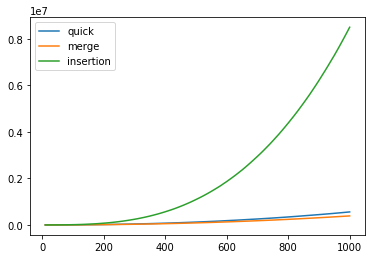

In [23]:
import numpy as np#provides polynomial fitting libraries
import matplotlib.pyplot as plt# for plotting
plt.plot(NSize,quick_sort)#x axis contains n size as 10,20,30 y axis contains average number of comparisons for that
plt.plot(NSize,merge_sort)
plt.plot(NSize,insertion_sort)
plt.legend(['quick','merge','insertion'])#legend for graph
fin=np.polyfit(NSize,insertion_sort,2)#returns coefficients of polynomial fitting of order 2
fq=np.polyfit(NSize,quick_sort,2)
fm=np.polyfit(NSize,merge_sort,2)
print(fin,fq,fm)
plt.show()#shows final graph